In [1]:
# 此Python 3环境预装了多个实用的分析库
# 由kaggle/python的Docker镜像定义：https://github.com/kaggle/docker-python
# 例如，以下是默认加载的几个核心库

import numpy as np  # 线性代数计算
import pandas as pd  # 数据处理/CSV文件操作（例如 pd.read_csv）
from datetime import datetime  # 日期时间处理

# 数据预处理与统计工具
from scipy.stats import skew  # 偏度计算
from scipy.special import boxcox1p  # Box-Cox转换
from scipy.stats import boxcox_normmax  # 计算最优Box-Cox参数

# 机器学习模型
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV  # 弹性网络/Lasso/Ridge回归（带交叉验证）
from sklearn.ensemble import GradientBoostingRegressor  # 梯度提升回归
from sklearn.svm import SVR  # 支持向量回归
from sklearn.pipeline import make_pipeline  # 管道操作
from sklearn.preprocessing import RobustScaler  # 鲁棒特征缩放
from sklearn.model_selection import KFold, cross_val_score  # 交叉验证
from sklearn.metrics import mean_squared_error  # 均方误差评估
from mlxtend.regressor import StackingCVRegressor  # 堆叠交叉验证回归器
from xgboost import XGBRegressor  # XGBoost回归
from lightgbm import LGBMRegressor  # LightGBM回归

# 可视化库
import matplotlib.pyplot as plt  # 基础绘图
import seaborn as sns  # 高级可视化

# 数据分析工具
import scipy.stats as stats  # 统计函数
import sklearn.linear_model as linear_model  # 线性模型扩展

# 降维与聚类
from sklearn.manifold import TSNE  # t-SNE降维
from sklearn.cluster import KMeans  # K均值聚类
from sklearn.decomposition import PCA  # 主成分分析
from sklearn.preprocessing import StandardScaler  # 标准特征缩放

# 系统操作
import os

# 忽略警告信息
import warnings
warnings.filterwarnings('ignore')

数据探索

In [2]:
# 加载数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print ("Data is loaded!")

Data is loaded!


In [3]:
print ("Train: ",train.shape[0],"sales, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"sales, and ",test.shape[1],"features")

Train:  1460 sales, and  81 features
Test:  1459 sales, and  80 features


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [7]:
# 定性属性
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [8]:
# 分类属性
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

<Axes: >

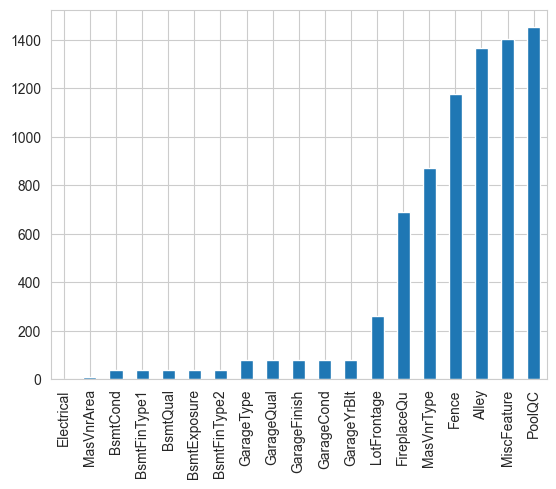

In [9]:
# 缺失值统计
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<Axes: title={'center': 'Log Normal'}, xlabel='SalePrice'>

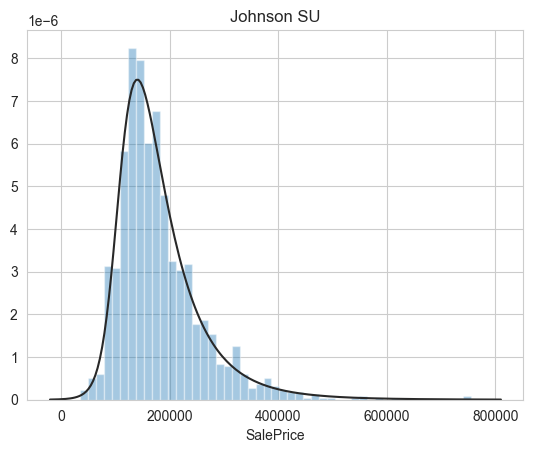

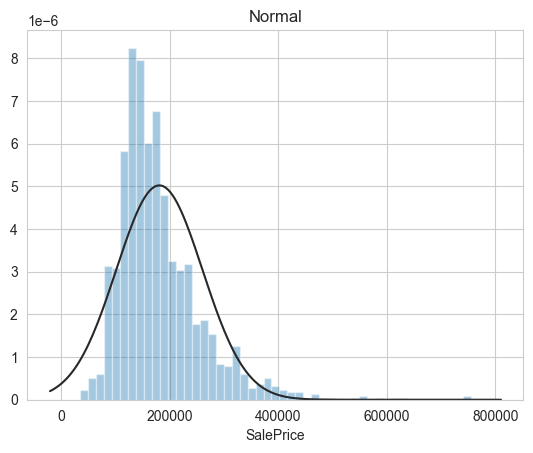

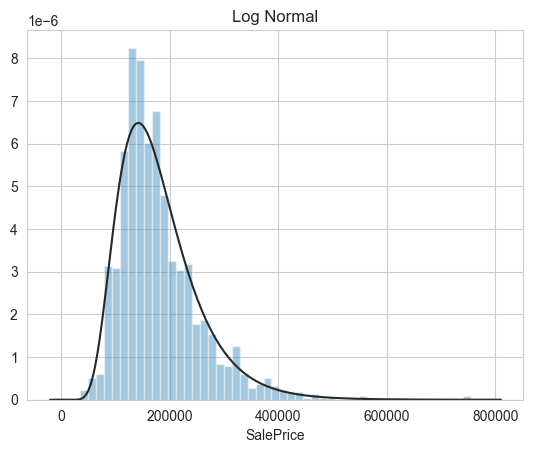

In [10]:
# 分布情况
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU') # 约翰逊分析
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal') # 正太分析
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal') # 对数正态分析
sns.distplot(y, kde=False, fit=stats.lognorm)

In [11]:
# 用于检测训练数据中所有定量特征是否都符合正态分布，阈值为p值0.01
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


In [12]:
# 该函数通过类别对应的目标变量均值对类别进行排序编码，转换为数值型特征，方便后续模型使用。
def encode(frame, feature):
    """
    对指定的分类特征进行基于目标变量SalePrice的有序编码。
    具体步骤：
    1. 计算该特征每个类别对应的SalePrice均值。
    2. 按均值对类别进行排序，均值低的类别编码为1，依次递增。
    3. 将排序后的编码赋值给新的特征列，列名为原特征名加后缀'_E'。

    参数：
    frame -- 包含数据的DataFrame
    feature -- 需要编码的分类特征名（字符串）
    """
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()  # 获取该特征所有唯一类别
    ordering.index = ordering.val
    # 计算每个类别对应的SalePrice均值
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    # 按均值排序
    ordering = ordering.sort_values('spmean')
    # 生成排序编码，均值最低为1，依次递增
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()

    # 将编码赋值给新的特征列
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

qual_encoded = []
for q in qualitative:
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


<Axes: >

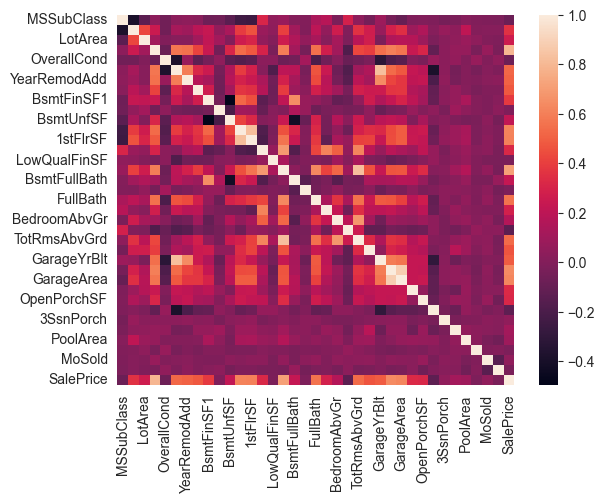

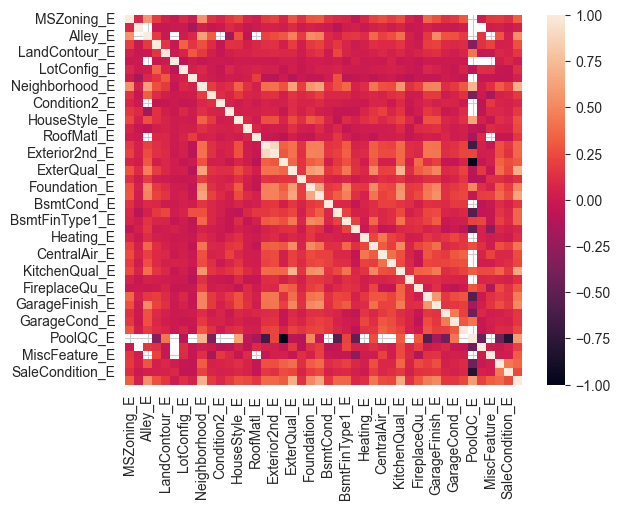

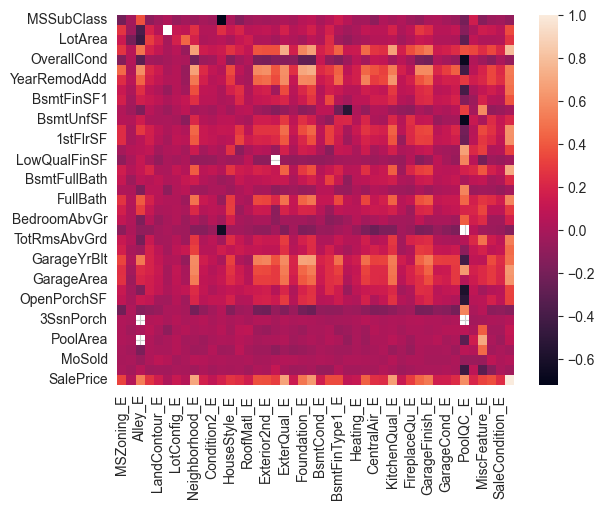

In [13]:
# 计算并可视化指定特征与目标变量'SalePrice'之间的Spearman相关系数
def spearman(frame, features):
    """
    计算并可视化指定特征与目标变量'SalePrice'之间的Spearman相关系数。

    参数：
    frame -- 包含数据的DataFrame
    features -- 需要计算相关系数的特征列表

    功能：
    1. 计算每个特征与'SalePrice'的Spearman相关系数。
    2. 按相关系数排序。
    3. 绘制水平条形图展示相关系数大小。
    """
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features = quantitative + qual_encoded

plt.figure(1)
corr = train[quantitative+['SalePrice']].corr()
sns.heatmap(corr)

plt.figure(2)
corr = train[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)

plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr)

0.7567219242750316


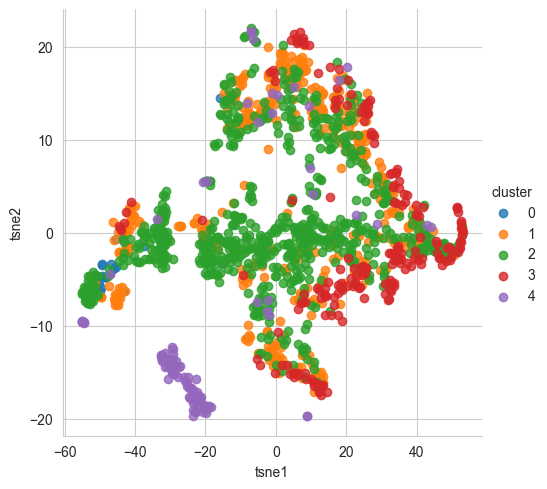

In [14]:
features = quantitative + qual_encoded

# 使用t-SNE进行降维，降到2维，便于可视化
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values  # 填充缺失值为0，转换为数组
tsne = model.fit_transform(X)  # t-SNE降维结果

# 标准化数据
std = StandardScaler()
s = std.fit_transform(X)

# 使用PCA降维到30维，提取主要成分
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)

# 对PCA降维后的数据进行KMeans聚类，分成5类
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

# 构造DataFrame保存t-SNE结果和聚类标签
fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})

# 绘制t-SNE降维后的点图，颜色区分聚类类别
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)

# 输出PCA前30个主成分解释的方差比例和
print(np.sum(pca.explained_variance_ratio_))

数据预处理

In [15]:
# 数据预处理
train.drop(['Id'], axis=1, inplace=True)  # 删除训练集中的Id列
test.drop(['Id'], axis=1, inplace=True)   # 删除测试集中的Id列

train = train[train.GrLivArea < 4500]     # 去除异常值，保留地上居住面积小于4500的样本
train.reset_index(drop=True, inplace=True)  # 重置索引，丢弃旧索引

train["SalePrice"] = np.log1p(train["SalePrice"])  # 对目标变量SalePrice取对数变换，减小偏态
y = train['SalePrice'].reset_index(drop=True)      # 重新索引目标变量y，方便后续使用

特征工程

In [16]:
# 特征工程
train_features = train.drop(['SalePrice'], axis=1)  # 训练集去除目标变量，保留特征
test_features = test  # 测试集特征
features = pd.concat([train_features, test_features]).reset_index(drop=True)  # 合并训练和测试特征，重置索引

In [17]:
features.shape

(2917, 122)

In [18]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,2.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0


In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)  # 数值型车库特征缺失值填充为0

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')  # 分类车库特征缺失值填充为'None'

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')  # 地下室相关分类特征缺失值填充为'None'

# 按MSSubClass分组，用组内MSZoning的众数填充缺失值
features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


In [20]:
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType_E,GarageFinish_E,GarageQual_E,GarageCond_E,PavedDrive_E,PoolQC_E,Fence_E,MiscFeature_E,SaleType_E,SaleCondition_E
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2.0,1.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,2.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,5.0,2.0,3.0,5.0,3.0,NaN,NaN,NaN,5.0,5.0


In [21]:
objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)
features.update(features[objects].fillna('None'))  # 对所有类别型特征缺失值填充为'None'

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))  # 按Neighborhood分组，用中位数填充LotFrontage缺失值

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))  # 对所有数值型特征缺失值填充为0


In [22]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = [col for col in features.columns if features[col].dtype in numeric_dtypes]

# 计算偏度并筛选偏度大于0.5的特征
skew_features = features[numerics2].apply(skew).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]

# 对偏度较大的特征使用对数变换（log1p），替代Box-Cox变换以提高兼容性
for col in high_skew.index:
    features[col] = np.log1p(features[col])


In [23]:
features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1) # 删除无用或缺失严重的特征列

features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd'] # 建造年份与翻新年份之和，反映房屋年龄相关信息

features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF'] # 总建筑面积（地下室+一二层）

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF']) # 总平方英尺（地下室+一二层）

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath'])) # 总浴室数量（全卫+半卫+地下室全卫+地下室半卫）

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF']) # 总露台面积（开放露台+三季露台+封闭露台+屏风露台+木质甲板）

In [24]:
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0) # 是否有游泳池
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0) # 是否有二层
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0) # 是否有车库
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0) # 是否有地下室
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0) # 是否有壁炉

In [25]:
features.shape

(2917, 129)

In [26]:
final_features = pd.get_dummies(features).reset_index(drop=True) # 对所有分类特征进行独热编码，转换为数值型特征
final_features.shape # 查看编码后的特征维度

(2917, 352)

In [27]:
# 从final_features中分割训练集特征和测试集特征
X = final_features.iloc[:len(y), :]   # 训练集特征，行数与目标变量y相同
X_sub = final_features.iloc[len(y):, :]  # 测试集特征，行数为剩余部分

# 输出训练集特征、目标变量和测试集特征的形状，方便检查数据维度是否正确
X.shape, y.shape, X_sub.shape


((1458, 352), (1458,), (1459, 352))

In [28]:
# 手动剔除训练集中明显的异常样本，索引为30, 88, 462, 631, 1322
outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])  # 从训练特征中删除异常样本
y = y.drop(y.index[outliers])  # 从目标变量中删除对应异常样本

# 识别过拟合特征：统计每个特征中出现频率最高的值的比例
overfit = []
for i in X.columns:
    counts = X[i].value_counts()  # 统计特征值频数
    zeros = counts.iloc[0]        # 出现频率最高的值的计数
    # 如果该值占比超过99.94%，认为该特征可能导致过拟合
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

# 将识别出的过拟合特征从训练集和测试集特征中删除X.shape, y.shape, X_sub.shape
overfit = list(overfit)
X = X.drop(overfit, axis=1)
X_sub = X_sub.drop(overfit, axis=1)


In [29]:
X.shape, y.shape, X_sub.shape

((1453, 347), (1453,), (1459, 347))

In [30]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    """
    计算预测值与真实值之间的均方根对数误差（RMSLE）

    参数:
    y : array-like
        真实目标值
    y_pred : array-like
        预测值

    返回:
    float
        RMSLE值
    """
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    """
    使用交叉验证计算模型的均方根误差（RMSE）

    参数:
    model : sklearn模型对象
        需要评估的回归模型
    X : DataFrame或array-like, 默认使用全局变量X
        特征数据

    返回:
    array
        每折交叉验证的RMSE数组
    """
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)


In [31]:
# RidgeCV模型的alpha参数候选值范围，用于岭回归的正则化强度调优
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

# LassoCV模型的alpha参数候选值范围，用于L1正则化强度调优
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

# ElasticNetCV模型的alpha参数候选值范围，用于L1和L2混合正则化强度调优
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]

# ElasticNetCV模型的l1_ratio参数候选值范围，控制L1正则化与L2正则化的权重比例
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]


In [32]:
ridge = make_pipeline(
    RobustScaler(),  # 使用RobustScaler进行数据缩放，减少异常值影响
    RidgeCV(alphas=alphas_alt, cv=kfolds)  # 岭回归，使用交叉验证选择最佳alpha参数
)

lasso = make_pipeline(
    RobustScaler(),  # 使用RobustScaler进行数据缩放
    LassoCV(max_iter=10000000, alphas=alphas2, random_state=42, cv=kfolds)  # Lasso回归，使用交叉验证选择最佳alpha，最大迭代次数较大
)

elasticnet = make_pipeline(
    RobustScaler(),  # 使用RobustScaler进行数据缩放
    ElasticNetCV(max_iter=10000000, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)  # 弹性网回归，交叉验证选择alpha和l1_ratio参数
)

svr = make_pipeline(
    RobustScaler(),  # 使用RobustScaler进行数据缩放
    SVR(C=20, epsilon=0.008, gamma=0.0003)  # 支持向量回归，设置惩罚参数C、epsilon和核函数gamma
)


In [33]:
gbr = GradientBoostingRegressor(
    n_estimators=3000,          # 弱学习器的数量，即迭代次数
    learning_rate=0.05,         # 学习率，控制每棵树对最终结果的贡献
    max_depth=4,                # 树的最大深度，控制模型复杂度
    max_features='sqrt',        # 每棵树考虑的最大特征数，取特征总数的平方根，减少过拟合
    min_samples_leaf=15,        # 叶子节点最少样本数，防止过拟合
    min_samples_split=10,       # 内部节点再划分所需最小样本数
    loss='huber',               # 损失函数，huber对异常值更鲁棒
    random_state=42             # 随机种子，保证结果可复现
)


In [34]:
lightgbm = LGBMRegressor(
    objective='regression',      # 目标函数为回归
    num_leaves=4,                # 树的最大叶子数，控制模型复杂度
    learning_rate=0.01,          # 学习率，控制每棵树对最终结果的贡献
    n_estimators=5000,           # 弱学习器的数量，即迭代次数
    max_bin=200,                 # 用于构建直方图的最大bin数，影响训练速度和精度
    bagging_fraction=0.75,       # 每次迭代随机选择75%的数据进行训练，防止过拟合
    bagging_freq=5,              # 每5次迭代执行一次bagging
    bagging_seed=7,              # bagging的随机种子，保证结果可复现
    feature_fraction=0.2,        # 每次迭代随机选择20%的特征，防止过拟合
    feature_fraction_seed=7,     # 特征选择的随机种子
    verbose=-1                   # 关闭训练过程中的日志输出
)


In [35]:
xgboost = XGBRegressor(
    learning_rate=0.01,       # 学习率，控制每棵树对最终结果的贡献
    n_estimators=3460,        # 弱学习器的数量，即迭代次数
    max_depth=3,              # 树的最大深度，控制模型复杂度
    min_child_weight=0,       # 决定最小叶子节点样本权重和，用于控制过拟合
    gamma=0,                  # 节点分裂所需的最小损失减少，控制模型复杂度
    subsample=0.7,            # 训练每棵树时使用的数据子样本比例，防止过拟合
    colsample_bytree=0.7,     # 构建每棵树时列采样的比例，防止过拟合
    objective='reg:linear',   # 目标函数，线性回归
    nthread=-1,               # 使用所有CPU线程进行训练
    scale_pos_weight=1,       # 类别不平衡时的权重调整，回归任务一般为1
    seed=27,                  # 随机种子，保证结果可复现
    reg_alpha=0.00006         # L1正则化项权重，控制模型复杂度
)


In [36]:
estimators = [
    ('ridge', ridge),
    ('lasso', lasso),
    ('elastic', elasticnet),
    ('gbr', gbr),
    ('xgb', xgboost),
    ('lgb', lightgbm)
]

from sklearn.ensemble import StackingRegressor

stack_gen = StackingRegressor(
    estimators=estimators,
    final_estimator=xgboost,
    cv=5,
    n_jobs=-1,
    passthrough=True  # 相当于use_features_in_secondary=True
)


In [37]:
# 计算并打印各模型的交叉验证RMSE均值和标准差，评估模型性能

score = cv_rmse(ridge)  # 计算Ridge模型的交叉验证RMSE
score = cv_rmse(lasso)  # 计算Lasso模型的交叉验证RMSE
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())  # 输出Lasso模型的平均RMSE和标准差及当前时间

score = cv_rmse(elasticnet)  # 计算ElasticNet模型的交叉验证RMSE
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())  # 输出ElasticNet模型的平均RMSE和标准差及当前时间

score = cv_rmse(svr)  # 计算SVR模型的交叉验证RMSE
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())  # 输出SVR模型的平均RMSE和标准差及当前时间

score = cv_rmse(lightgbm)  # 计算LightGBM模型的交叉验证RMSE
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())  # 输出LightGBM模型的平均RMSE和标准差及当前时间

score = cv_rmse(gbr)  # 计算GradientBoosting模型的交叉验证RMSE
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())  # 输出GradientBoosting模型的平均RMSE和标准差及当前时间

score = cv_rmse(xgboost)  # 计算XGBoost模型的交叉验证RMSE
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now())  # 输出XGBoost模型的平均RMSE和标准差及当前时间


LASSO: 0.1024 (0.0151)
 2025-06-20 14:21:45.823952
elastic net: 0.1024 (0.0150)
 2025-06-20 14:22:25.748736
SVR: 0.1013 (0.0128)
 2025-06-20 14:22:27.813366
lightgbm: 0.1046 (0.0156)
 2025-06-20 14:22:39.782941
gbr: 0.1079 (0.0132)
 2025-06-20 14:23:43.880137
xgboost: 0.1049 (0.0147)
 2025-06-20 14:24:27.259080


In [38]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

print('GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
elasticnet
Lasso
Ridge
Svr
GradientBoosting
xgboost
lightgbm


模型构建

In [39]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [40]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.05341599450566762


In [41]:
print('Predict submission')
submission = pd.read_csv("./sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))

Predict submission


In [43]:
print('Blend with Top Kernels submissions\n')
sub_1 = pd.read_csv('./input/House_Prices_submit.csv')
sub_2 = pd.read_csv('./input/hybrid_solution.csv')
sub_3 = pd.read_csv('./input/lasso_sol22_Median.csv')
submission.iloc[:,1] = np.floor((0.25 * np.floor(np.expm1(blend_models_predict(X_sub)))) +
                                (0.25 * sub_1.iloc[:,1]) +
                                (0.25 * sub_2.iloc[:,1]) +
                                (0.25 * sub_3.iloc[:,1]))

Blend with Top Kernels submissions



In [44]:
q1 = submission['SalePrice'].quantile(0.005)
q2 = submission['SalePrice'].quantile(0.995)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission_2.1.csv", index=False)

In [45]:
submission.head()

,Id,SalePrice
0,1461,106991.0
1,1462,142351.0
2,1463,160418.0
3,1464,172979.0
4,1465,166604.0


新模型

In [46]:
from datetime import datetime

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor

In [52]:
# Based on https://www.kaggle.com/hemingwei/top-2-from-laurenstc-on-house-price-prediction

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
print("Train set size:", train.shape)
print("Test set size:", test.shape)
print('START data processing', datetime.now(), )

train_ID = train['Id']
test_ID = test['Id']
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

# Deleting outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)
# Some of the non-numeric predictors are stored as numbers; we convert them into strings
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

features["PoolQC"] = features["PoolQC"].fillna("None")

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Filling in the rest of the NA's

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

# skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

# high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

# 计算偏度并筛选偏度大于0.5的特征
skew_features = features[numerics2].apply(skew).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]

# 对偏度较大的特征使用对数变换（log1p），替代Box-Cox变换以提高兼容性
for col in high_skew.index:
    features[col] = np.log1p(features[col])

features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

# simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print(features.shape)
final_features = pd.get_dummies(features).reset_index(drop=True)
print(final_features.shape)

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_sub = X_sub.drop(overfit, axis=1).copy()

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

# ################## ML ########################################
print('START ML', datetime.now(), )

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


# build our model scoring function
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)


# setup models
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=10000000, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=10000000, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))

svr = make_pipeline(RobustScaler(),
                      SVR(C= 20, epsilon= 0.008, gamma=0.0003,))


gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =42)


lightgbm = LGBMRegressor(objective='regression',
                                       num_leaves=4,
                                       learning_rate=0.01,
                                       n_estimators=5000,
                                       max_bin=200,
                                       bagging_fraction=0.75,
                                       bagging_freq=5,
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       #min_data_in_leaf=2,
                                       #min_sum_hessian_in_leaf=11
                                       )


xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

estimators = [
    ('ridge', ridge),
    ('lasso', lasso),
    ('elastic', elasticnet),
    ('gbr', gbr),
    ('xgb', xgboost),
    ('lgb', lightgbm)
]

from sklearn.ensemble import StackingRegressor

stack_gen = StackingRegressor(
    estimators=estimators,
    final_estimator=xgboost,
    cv=5,
    n_jobs=-1,
    passthrough=True  # 相当于use_features_in_secondary=True
)


print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )


print('START Fit')
print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
print(datetime.now(), 'elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print(datetime.now(), 'lasso')
lasso_model_full_data = lasso.fit(X, y)
print(datetime.now(), 'ridge')
ridge_model_full_data = ridge.fit(X, y)
print(datetime.now(), 'svr')
svr_model_full_data = svr.fit(X, y)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print(datetime.now(), 'xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print(datetime.now(), 'lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

Train set size: (1460, 81)
Test set size: (1459, 80)
START data processing 2025-06-20 14:43:49.129178
(2917, 79)
(2917, 86)
(2917, 333)
X (1458, 333) y (1458,) X_sub (1459, 333)
X (1453, 331) y (1453,) X_sub (1459, 331)
START ML 2025-06-20 14:43:49.293951
TEST score on CV
Kernel Ridge score: 0.1041 (0.0150)
 2025-06-20 14:43:59.954087
Lasso score: 0.1047 (0.0164)
 2025-06-20 14:44:17.582699
ElasticNet score: 0.1044 (0.0162)
 2025-06-20 14:45:19.855605
SVR score: 0.1029 (0.0141)
 2025-06-20 14:45:22.385763
Lightgbm score: 0.1060 (0.0162)
 2025-06-20 14:45:33.492882
GradientBoosting score: 0.1069 (0.0138)
 2025-06-20 14:46:54.239440
Xgboost score: 0.1087 (0.0168)
 2025-06-20 14:47:36.375988
START Fit
2025-06-20 14:47:36.375988 StackingCVRegressor
2025-06-20 14:48:46.419041 elasticnet
2025-06-20 14:48:53.892910 lasso
2025-06-20 14:48:56.364985 ridge
2025-06-20 14:48:57.551438 svr
2025-06-20 14:48:57.855858 GradientBoosting
2025-06-20 14:49:06.308898 xgboost
2025-06-20 14:49:10.481271 ligh

In [53]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.1 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
            (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.25 * stack_gen_model.predict(np.array(X))))

print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.05767583752312434


In [55]:
print('Predict submission', datetime.now(),)
submission = pd.read_csv("./sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))

# this kernel gave a score 0.114
# let's up it by mixing with the top kernels

print('Blend with Top Kernals submissions', datetime.now(),)
sub_1 = pd.read_csv('./input/House_Prices_submit.csv')
sub_2 = pd.read_csv('./input/hybrid_solution.csv')
sub_3 = pd.read_csv('./input/lasso_sol22_Median.csv')

submission.iloc[:,1] = np.floor((0.25 * np.floor(np.expm1(blend_models_predict(X_sub)))) +
                                (0.25 * sub_1.iloc[:,1]) +
                                (0.25 * sub_2.iloc[:,1]) +
                                (0.25 * sub_3.iloc[:,1]))

Predict submission 2025-06-20 14:49:27.011235
Blend with Top Kernals submissions 2025-06-20 14:49:27.677941


In [56]:
# Brutal approach to deal with predictions close to outer range
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)

submission.to_csv("submission_2.2.csv", index=False)
print('Save submission', datetime.now(),)

Save submission 2025-06-20 14:49:29.413727


In [57]:
submission.head()

,Id,SalePrice
0,1461,122333.0
1,1462,163652.0
2,1463,184854.0
3,1464,198992.0
4,1465,193036.0
